In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('supermarket_customer_capstone_2.csv')

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kid,Teen,Date_of_Customer,Recency,Wine_2Y,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital Status,Years
0,1501,1982,PhD,Married,160803,0,0,4/8/2012,21,55,...,0,0,0,0,0,3,11,0,Married,2012
1,2798,1977,PhD,Together,102160,0,0,2/11/2012,54,763,...,1,1,1,0,0,3,11,1,Married,2012
2,10619,1994,Graduation,Single,95529,0,0,3/12/2012,29,770,...,0,1,0,0,0,3,11,1,Single,2012
3,4070,1969,PhD,Married,94871,0,2,1/9/2012,99,169,...,1,1,0,0,0,3,11,1,Married,2012
4,7627,1975,Master,Married,92163,0,0,12/12/2012,25,817,...,0,1,1,0,0,3,11,1,Married,2012


In [9]:
for column in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())


Value counts for Education:
Education
Graduation    1115
PhD            479
Master         364
2n Cycle       200
Basic           54
Name: count, dtype: int64

Value counts for Marital_Status:
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Name: count, dtype: int64

Value counts for Date_of_Customer:
Date_of_Customer
31-08-2012    12
14-02-2013    11
12/5/2014     11
12/9/2012     11
22-05-2014    10
              ..
23-08-2012     1
20-07-2013     1
2/9/2012       1
10/4/2014      1
13-03-2014     1
Name: count, Length: 662, dtype: int64

Value counts for Marital Status:
Marital Status
Married     1430
Single       474
Divorced     308
Name: count, dtype: int64


In [11]:
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)



Descriptive Statistics:
                 ID   Year_Birth         Income          Kid         Teen  \
count   2212.000000  2212.000000    2212.000000  2212.000000  2212.000000   
mean    5587.731917  1968.811031   52232.510850     0.442586     0.505425   
std     3247.944128    11.982065   25187.455359     0.537052     0.544258   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35233.500000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency      Wine_2Y    Fruits_2Y      Meat_2Y      FISH_2Y  ...  \
count  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000  ...   
mean     49.050633   305.030741    26.324593   166.970163    37.516275  ...   
std      28.940794   337.611255    39.781794

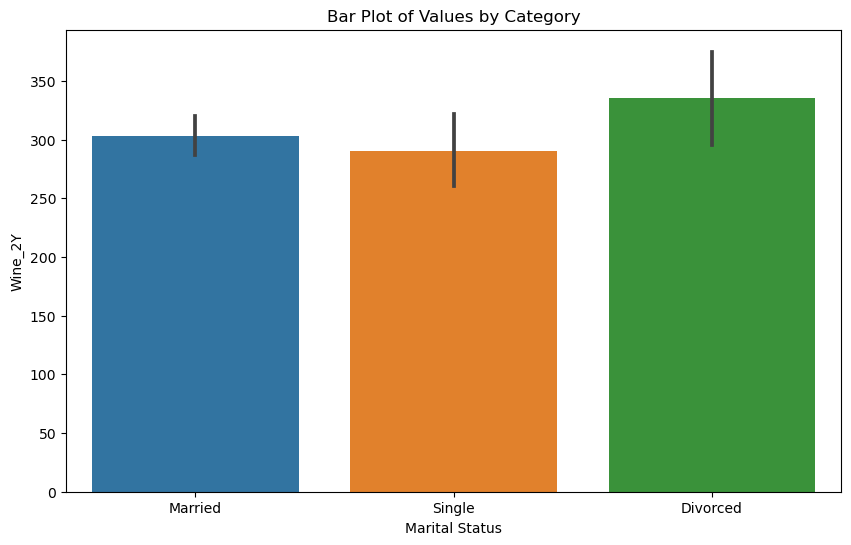

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Wine_2Y', data=df)
plt.title('Bar Plot of Values by Category')
plt.xlabel('Marital Status')
plt.ylabel('Wine_2Y')
plt.show()

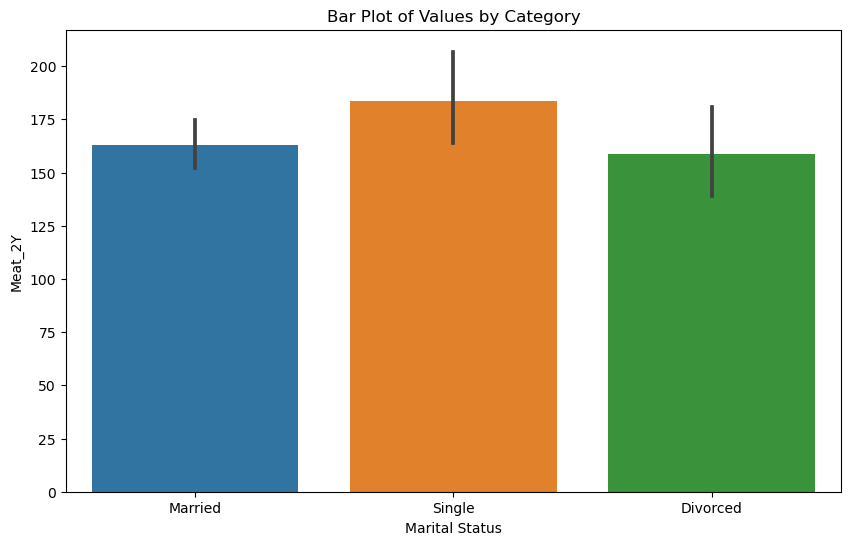

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Meat_2Y', data=df)
plt.title('Bar Plot of Values by Category')
plt.xlabel('Marital Status')
plt.ylabel('Meat_2Y')
plt.show()

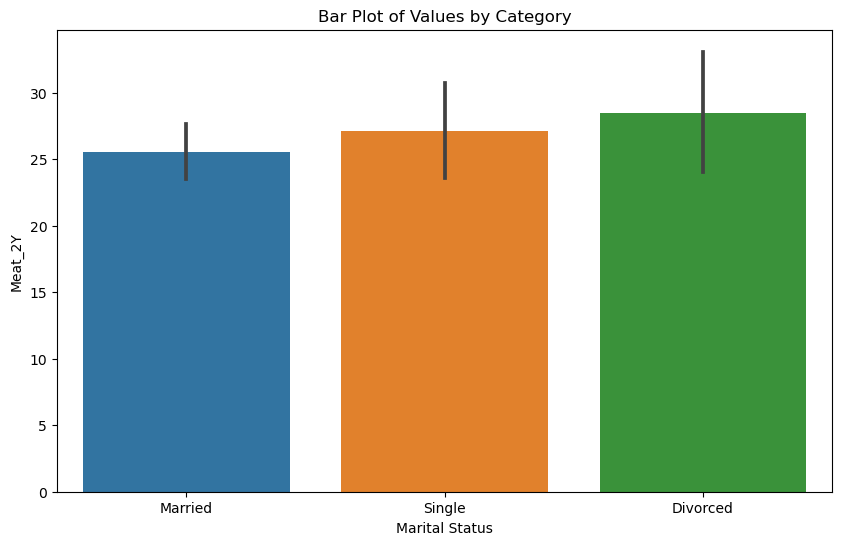

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Fruits_2Y', data=df)
plt.title('Bar Plot of Values by Category')
plt.xlabel('Marital Status')
plt.ylabel('Meat_2Y')
plt.show()

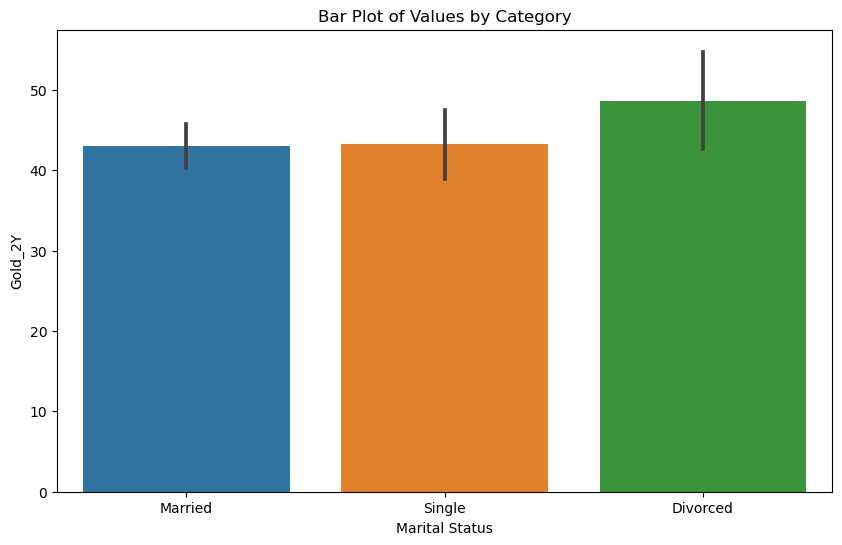

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Gold_2Y', data=df)
plt.title('Bar Plot of Values by Category')
plt.xlabel('Marital Status')
plt.ylabel('Gold_2Y')
plt.show()

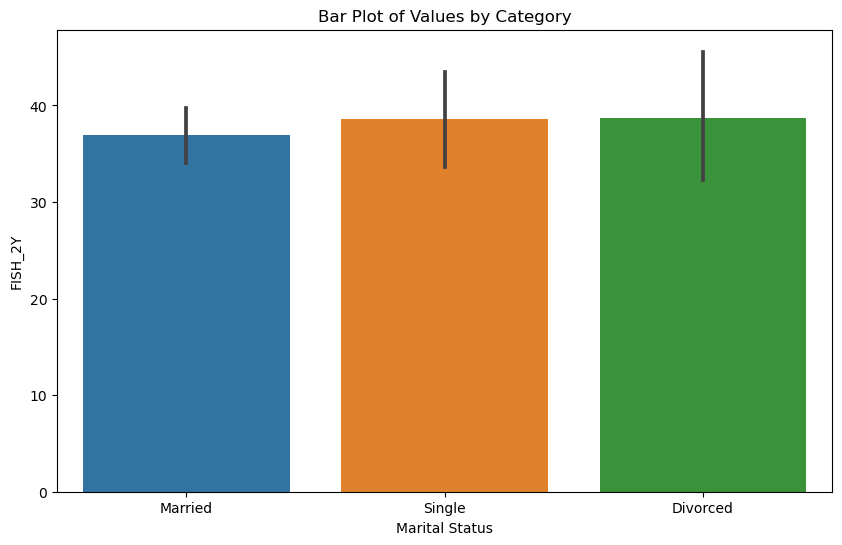

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='FISH_2Y', data=df)
plt.title('Bar Plot of Values by Category')
plt.xlabel('Marital Status')
plt.ylabel('FISH_2Y')
plt.show()

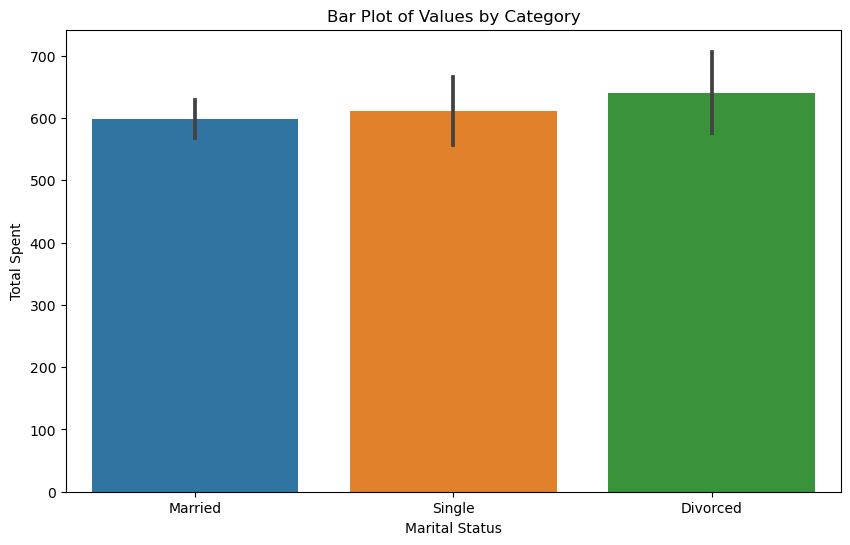

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Total Spent', data=df)
plt.title('Bar Plot of Values by Category')
plt.xlabel('Marital Status')
plt.ylabel('Total Spent')
plt.show()

In [31]:
column_name = 'Total Spent'

if column_name in df.columns:
    stats = df[column_name].describe()
    print(stats)
else:
    print(f"The column '{column_name}' does not exist in the DataFrame.")

count    2212.000000
mean      606.711573
std       603.163013
min         5.000000
25%        68.750000
50%       396.000000
75%      1047.250000
max      2525.000000
Name: Total Spent, dtype: float64


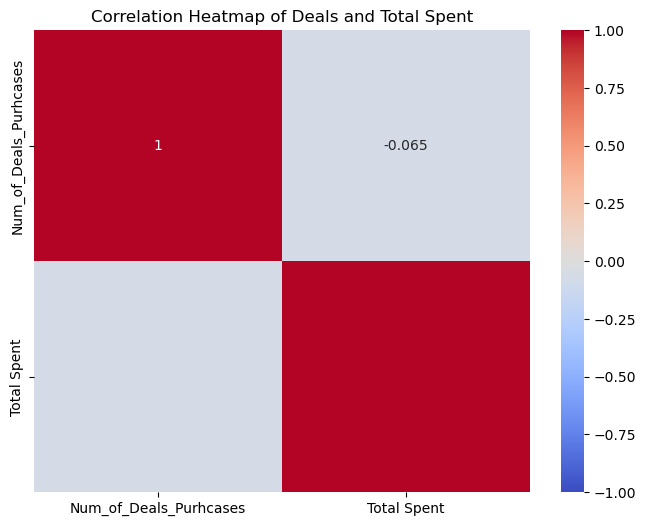

In [33]:
if 'Num_of_Deals_Purhcases' in df.columns and 'Total Spent' in df.columns:

    corr_matrix = df[['Num_of_Deals_Purhcases', 'Total Spent']].corr()

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Deals and Total Spent')
    plt.show()

In [39]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(df['Num_of_Deals_Purhcases'], df['Num_of_Web_Purhcases'], df['Num_of_Catalog_Purhcases'], df['Num_of_Store_Purhcases'])

print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("The differences between selling place are statistically significant.")
else:
    print("The differences between selling place are not statistically significant.")

F-statistic: 730.7620
P-value: 0.0000
The differences between selling place are statistically significant.


In [43]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [47]:
X = df[['Num_of_Deals_Purhcases']]  
Y = df['Total Spent']         

model = LinearRegression()
model.fit(X, Y)

intercept = model.intercept_
slope = model.coef_[0]

print(f'Intercept: {intercept:.2f}')
print(f'Slope (Coefficient of Num_of_Deals_Purhcases): {slope:.2f}')

Intercept: 654.32
Slope (Coefficient of Num_of_Deals_Purhcases): -20.51


In [51]:
import statsmodels.api as sm
X_with_const = sm.add_constant(X)

model = sm.OLS(Y, X_with_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Spent   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     9.494
Date:                Wed, 10 Jul 2024   Prob (F-statistic):            0.00209
Time:                        22:32:00   Log-Likelihood:                -17295.
No. Observations:                2212   AIC:                         3.459e+04
Df Residuals:                    2210   BIC:                         3.461e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    654

In [53]:
f_statistic, p_value = f_oneway(df['AcceptedCmp1'], df['AcceptedCmp2'], df['AcceptedCmp3'], df['AcceptedCmp4'],df['AcceptedCmp5'],df['Response'])

print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("The differences between deals are statistically significant.")
else:
    print("The differences between deals place are not statistically significant.")

F-statistic: 62.1417
P-value: 0.0000
The differences between deals are statistically significant.
